# Création d'un Oracle
**Crédit Agricole : Ateliers Quantiques 2025**  
**Atelier 3 — Partie 1.**

---

## Motivation

L’objectif de ce tutoriel est de montrer comment construire un **oracle quantique**.  
Un oracle est une opération unitaire $U_f$ qui agit ainsi :

$$
U_f \,|x⟩ = (-1)^{f(x)} |x⟩
$$

où $f(x)$ est une fonction de décision qui vaut 1 uniquement pour l’état solution.  
Cela signifie que **l’état cible change de signe** (phase -1), tandis que les autres restent inchangés (+1).

Nous allons vérifier ce phénomène explicitement en observant le vecteur d’état.


In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
import numpy as np

# --- Backend
backend = AerSimulator(method='statevector')


## Représentation d’un état quantique

Pour $n$ qubits, on a $2^n$ états de base.  
Par exemple, avec $n=2$ qubits :

- |00⟩
- |01⟩
- |10⟩
- |11⟩

Nous allons préparer une **superposition uniforme** sur ces 4 états, puis appliquer un oracle qui marque un état choisi (par exemple |11⟩).


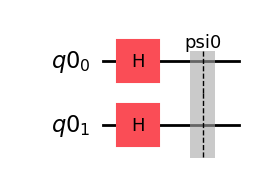

In [3]:
# --- Nombre de qubits
n = 2

# --- Registre quantique
qreg = QuantumRegister(n)
circ = QuantumCircuit(qreg)

# Préparer la superposition uniforme avec H sur chaque qubit
circ.h(qreg)

# Sauvegarder l'état initial
circ.save_statevector(label="psi0")

circ.draw("mpl")


## Construction de l’oracle

Nous choisissons comme état cible $|11⟩$.  

Pour le marquer, on peut appliquer une porte `CZ` (controlled-Z) qui applique une phase -1 uniquement quand les deux qubits valent 1.  

Cela correspond exactement à notre fonction :
$$
f(x) = \begin{cases} 
1 & \text{si } x = 11 \\ 
0 & \text{sinon} 
\end{cases}
$$


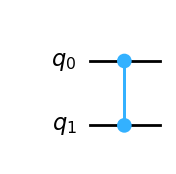

In [4]:
oracle = QuantumCircuit(n, name="Oracle")
oracle.cz(0, 1)   # Marque l'état |11⟩
oracle.draw("mpl")


## Application de l’oracle et vérification des amplitudes

Nous ajoutons l’oracle au circuit, puis examinons le vecteur d’état avant et après.  
Nous devons observer que **l’amplitude de |11⟩ a changé de signe**.


In [5]:
# Circuit complet
circ_oracle = circ.compose(oracle)

# Sauvegarder l'état final
circ_oracle.save_statevector(label="psi1")

# Simulation
result = backend.run(circ_oracle).result()
states = result.data()

psi0 = states["psi0"]
psi1 = states["psi1"]

print("État initial :", psi0)
print("État après oracle :", psi1)


État initial : Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
État après oracle : Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


## Analyse des résultats

Dans le vecteur d’état initial (superposition uniforme), chaque état a la même amplitude $1/\sqrt{2^n}$.

Après application de l’oracle :

- Les amplitudes de |00⟩, |01⟩ et |10⟩ restent inchangées (+1).  
- L’amplitude de |11⟩ est multipliée par -1.  

C’est exactement le comportement attendu : l’oracle agit comme un **sélecteur de phase**.


---

## Exercice : Construction d’un oracle sur 3 qubits

### Énoncé

Nous allons maintenant généraliser à **3 qubits**.  
On prépare une superposition uniforme sur les 8 états de base :  

$$
|ψ⟩ = \frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x⟩
$$

Puis nous voulons construire un oracle qui **marque l’état |101⟩** (c’est-à-dire l’état numéro 5 en binaire).  

### Tâches

1. Créer un registre quantique de 3 qubits.  
2. Préparer une superposition uniforme avec des portes Hadamard.  
3. Construire un oracle qui applique une phase $-1$ uniquement à l’état |101⟩.  
4. Vérifier, en affichant le vecteur d’état et un histogramme, que seule l’amplitude de |101⟩ a changé de signe.  

### À compléter

Complétez les parties marquées `____`.


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np

# --- Backend
backend = AerSimulator()

# --- Registres
qreg3 = QuantumRegister(3, "q")
creg3 = ClassicalRegister(3, "c")
circ3 = QuantumCircuit(qreg3, creg3)

# 1. Préparer la superposition uniforme sur 3 qubits
circ3.___([0, 1, 2])   # (indice : porte de Hadamard)

# 2. Construction de l’oracle pour marquer |101⟩
oracle3 = QuantumCircuit(3)

# Étape 1 : forcer q1 = 0
oracle3.___(1)         # (indice : porte X)

# Étape 2 : appliquer un contrôle contrôlé sur q0 et q1 vers q2
oracle3.___(2)         # (indice : mettre q2 en base |+⟩ / |−⟩)
oracle3.___(0, 1, 2)   # (indice : porte Toffoli)
oracle3.___(2)         # (indice : revenir en base computational)

# Étape 3 : remettre q1 à sa valeur initiale
oracle3.___(1)

# 3. Composer l’oracle avec le circuit principal
circ3.___(oracle3, inplace=True)

# Sauvegarder le vecteur d’état
circ3.___()

# Simulation
result3 = backend.run(circ3).result()
psi3 = result3.___(circ3)

print("Vecteur d'état après oracle (à vérifier) :")
for i, amp in enumerate(psi3):
    if abs(amp) > 1e-6:
        print(f"|{i:03b}⟩ : {np.round(amp, 3)}")


### Vérification

Exécutons maintenant la simulation et affichons :  
1. le vecteur d’état (amplitudes),  
2. un histogramme après mesure.


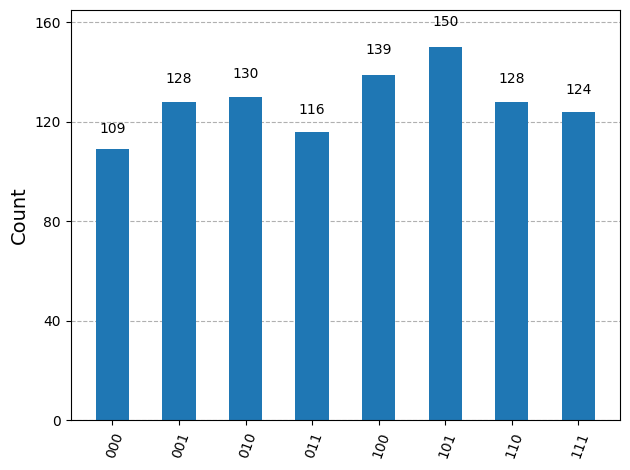

In [20]:
circ3.measure(qreg3, creg3)
result3_meas = backend.run(circ3, shots=1024).result()
counts3 = result3_meas.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts3)
